In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [27]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
data = pd.read_csv("C:/Users/asus/OneDrive/Desktop/Twitter_Data.csv")
data

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [29]:
data.shape

(162980, 2)

In [30]:
data.isna().sum()

clean_text    4
category      7
dtype: int64

In [31]:
data.dropna(inplace = True)

In [32]:
data.isna().sum()

clean_text    0
category      0
dtype: int64

In [33]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
162975    False
162976    False
162977    False
162978    False
162979    False
Length: 162969, dtype: bool

In [34]:
data = data.drop_duplicates(keep='first')

In [35]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
162975    False
162976    False
162977    False
162978    False
162979    False
Length: 162969, dtype: bool

# Data Preprocessing

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162969 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162969 non-null  object 
 1   category    162969 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.7+ MB


In [37]:
data["category"].value_counts()

 1.0    72249
 0.0    55211
-1.0    35509
Name: category, dtype: int64

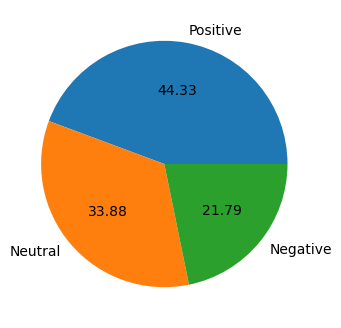

In [38]:
# Visualizing
plt.figure(figsize=(7,4))
plt.pie(data['category'].value_counts(), labels =['Positive','Neutral','Negative'], autopct='%0.2f')
plt.show()

In [39]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import re
ps = PorterStemmer()

In [40]:
from nltk.stem import WordNetLemmatizer

Lemmatizer = WordNetLemmatizer() 

In [41]:
# Cleaning the text
def transform_text(review):
    review = re.sub('[^a-zA-Z]', " ",review)
    review = review.lower()
    review = review.split()
    review = [Lemmatizer.lemmatize(word) for word in review if word not in set(stopwords.words("english"))]
    review = " ".join(review)
    return review

In [44]:
def transform_text(text):
    text = re.sub('[^a-zA-Z]',' ',text)
    text = text.split()
    text = [ps.stem(word) for word in text if word not in set(stopwords.words('english'))]
    text = ' '.join(text)
    return text 

In [43]:
data['Transformed_text'] = data['clean_text'].apply(transform_text)

In [45]:
data.head()

,clean_text,category,Transformed_text
0,when modi promised “minimum government maximum...,-1.0,modi promis minimum govern maximum govern expe...
1,talk all the nonsense and continue all the dra...,0.0,talk nonsens continu drama vote modi
2,what did just say vote for modi welcome bjp t...,1.0,say vote modi welcom bjp told rahul main campa...
3,asking his supporters prefix chowkidar their n...,1.0,ask support prefix chowkidar name modi great s...
4,answer who among these the most powerful world...,1.0,answer among power world leader today trump pu...


In [46]:
print(data['Transformed_text'])

0         modi promis minimum govern maximum govern expe...
1                      talk nonsens continu drama vote modi
2         say vote modi welcom bjp told rahul main campa...
3         ask support prefix chowkidar name modi great s...
4         answer among power world leader today trump pu...
                                ...                        
162975    crore paid neerav modi recov congress leader h...
162976    dear rss terrorist payal gawar modi kill plu m...
162977                            cover interact forum left
162978    big project came india modi dream project happ...
162979    ever listen like gurukul disciplin maintain ev...
Name: Transformed_text, Length: 162969, dtype: object


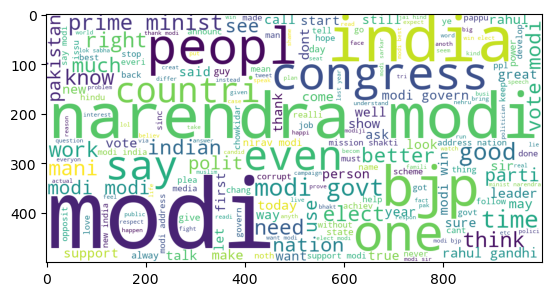

In [50]:
## Word Cloud Formation of Positive
from wordcloud import WordCloud

wc = WordCloud(width=1000, height=500, min_font_size=10, background_color = 'white')

Positive_wc = wc.generate(data[data["category"]== 1]['Transformed_text'].str.cat(sep = " "))

plt.imshow(Positive_wc)

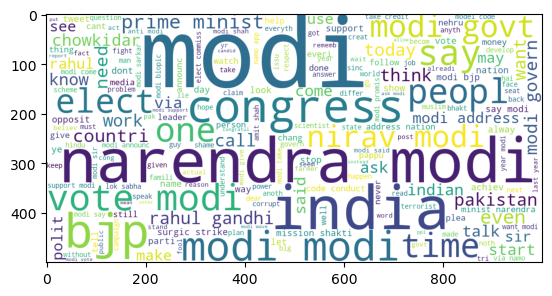

In [51]:
## Word Cloud Formation of Neutral
from wordcloud import WordCloud

wc = WordCloud(width=1000, height=500, min_font_size=10, background_color = 'white')

Neutral_wc = wc.generate(data[data["category"]== 0]['Transformed_text'].str.cat(sep = " "))

plt.imshow(Neutral_wc)

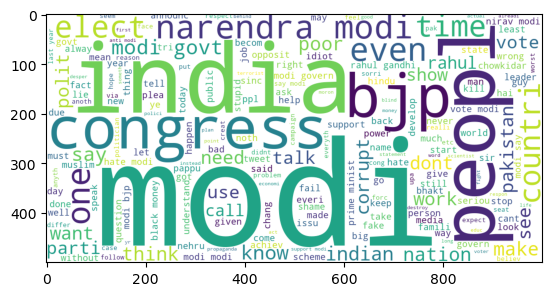

In [54]:
## Word Cloud Formation of Negative
from wordcloud import WordCloud

wc = WordCloud(width=1000, height=500, min_font_size=10, background_color = 'white')

Negative_wc = wc.generate(data[data["category"]== -1]['Transformed_text'].str.cat(sep = " "))

plt.imshow(Negative_wc)

# Model Building

In [59]:
X = data['Transformed_text'].values
y = data['category'].values

In [60]:
print(X)

['modi promis minimum govern maximum govern expect begin difficult job reform state take year get justic state busi exit psu templ'
 'talk nonsens continu drama vote modi'
 'say vote modi welcom bjp told rahul main campaign modi think modi relax'
 ... 'cover interact forum left'
 'big project came india modi dream project happen realiti'
 'ever listen like gurukul disciplin maintain even narendra modi rss maintain cultur indian attack polit someon attack hinduism rss take action proud']


In [61]:
print(y)

[-1.  0.  1. ...  0.  0.  1.]


In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 2)

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()

X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

In [64]:
print(X_train)

  (0, 47586)	0.2983145119675673
  (0, 20798)	0.4752722246634775
  (0, 39982)	0.06821844133544888
  (0, 52262)	0.45010660278961806
  (0, 56463)	0.3948794331973525
  (0, 19469)	0.35769091993159624
  (0, 44938)	0.36896070200003805
  (0, 69873)	0.240562869570092
  (1, 23468)	0.2965221133591825
  (1, 39610)	0.24552677726634095
  (1, 20593)	0.16560149471129892
  (1, 34822)	0.5849085348301539
  (1, 14107)	0.16474550092734236
  (1, 22417)	0.22495993235741824
  (1, 16185)	0.19195735722206575
  (1, 28696)	0.1918637670022201
  (1, 59050)	0.20363717761192518
  (1, 66866)	0.22468424185505048
  (1, 13282)	0.19354461211393675
  (1, 21182)	0.2866892762354476
  (1, 43136)	0.20962071164288143
  (1, 52355)	0.2176132697081847
  (1, 61018)	0.16361569557691766
  (1, 39982)	0.03426609216230759
  (2, 5209)	0.42185758473419827
  :	:
  (130372, 26409)	0.1892547312342725
  (130372, 48763)	0.15898230233740943
  (130372, 54550)	0.16402890521480887
  (130372, 67660)	0.40444787564440704
  (130372, 28949)	0.141436995

In [65]:
print(X_test)

  (0, 69383)	0.17703506159736448
  (0, 62477)	0.19321551694223693
  (0, 60874)	0.2584914304139342
  (0, 59103)	0.16796087158580883
  (0, 58620)	0.23085882268771168
  (0, 58257)	0.26789068969429464
  (0, 55285)	0.18344574050459903
  (0, 48786)	0.2164374533353397
  (0, 45338)	0.17339871562341028
  (0, 42679)	0.14131856509912832
  (0, 39683)	0.19686381227635874
  (0, 38699)	0.18204234057821916
  (0, 36589)	0.2922800378651967
  (0, 28822)	0.10528784368247036
  (0, 28797)	0.23792126988404902
  (0, 16226)	0.20481173795977578
  (0, 12004)	0.20845288043903473
  (0, 2783)	0.1752322882874217
  (0, 2495)	0.31615088671102737
  (0, 2418)	0.2493523672726203
  (0, 1113)	0.27830136361363833
  (1, 56738)	0.40098856461609633
  (1, 50407)	0.5015842046935997
  (1, 42679)	0.2906854605263215
  (1, 39982)	0.08531876299191261
  :	:
  (32592, 57460)	0.2543657571778626
  (32592, 47389)	0.12445448827274398
  (32592, 46206)	0.1640804896385873
  (32592, 43504)	0.18339970375873943
  (32592, 39982)	0.039514176845401

# Naive Bayes

In [66]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

In [74]:
mnb = MultinomialNB()

mnb.fit(X_train, y_train)
y_pred1 = mnb.predict(X_test)

In [75]:
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

0.57298889366141
[[  853   373  5837]
 [   54  3698  7238]
 [   46   370 14125]]


# Logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression(max_iter=1000)

In [79]:
regressor.fit(X_train, y_train)
y_pred2 = regressor.predict(X_test)

In [78]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

0.8451248696079033
[[ 5064   952  1047]
 [  340 10007   643]
 [  772  1294 12475]]


# Support Vector Machine (SVM)

In [ ]:
from sklearn import svm

clf = svm.SVC()

clf.fit(X_train,y_train)
y_pred3 = clf.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))